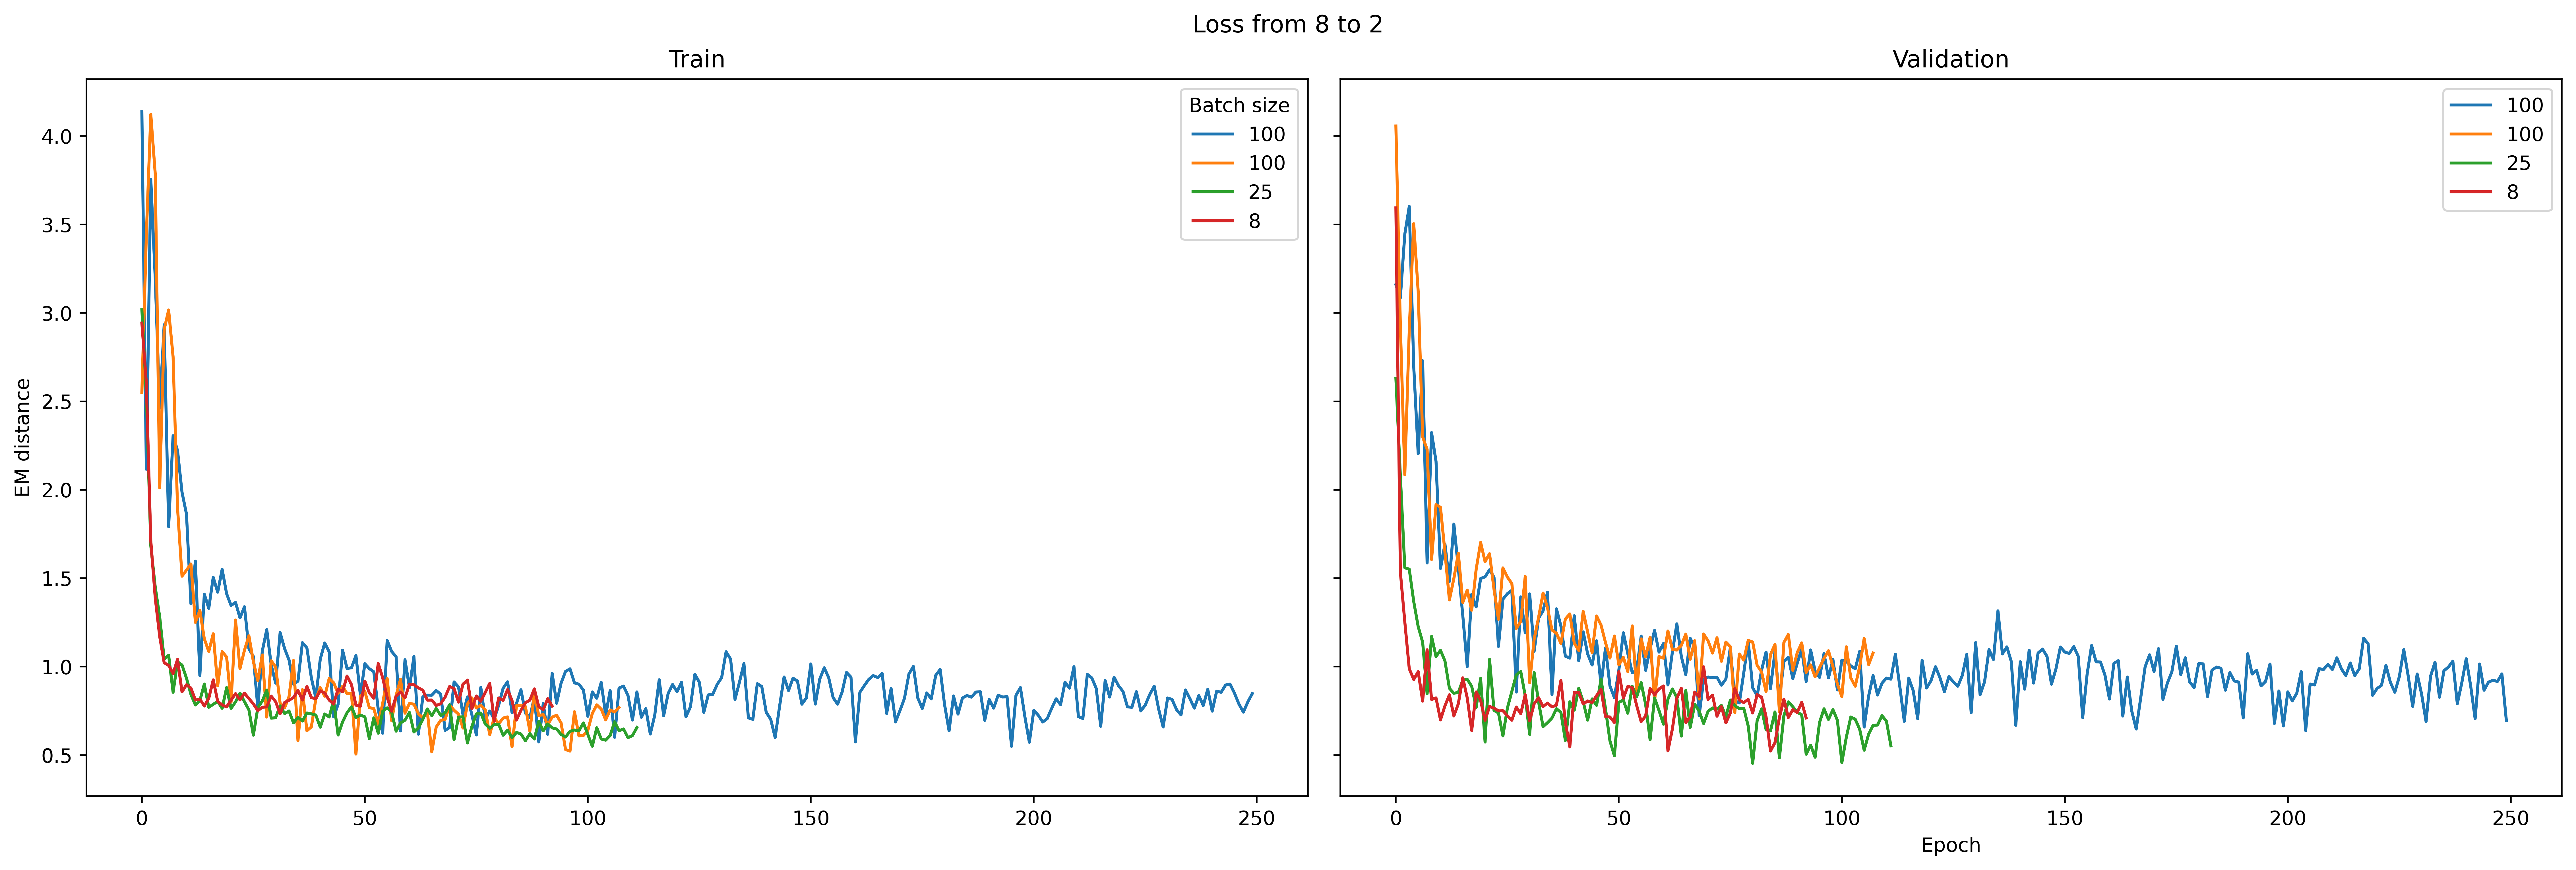

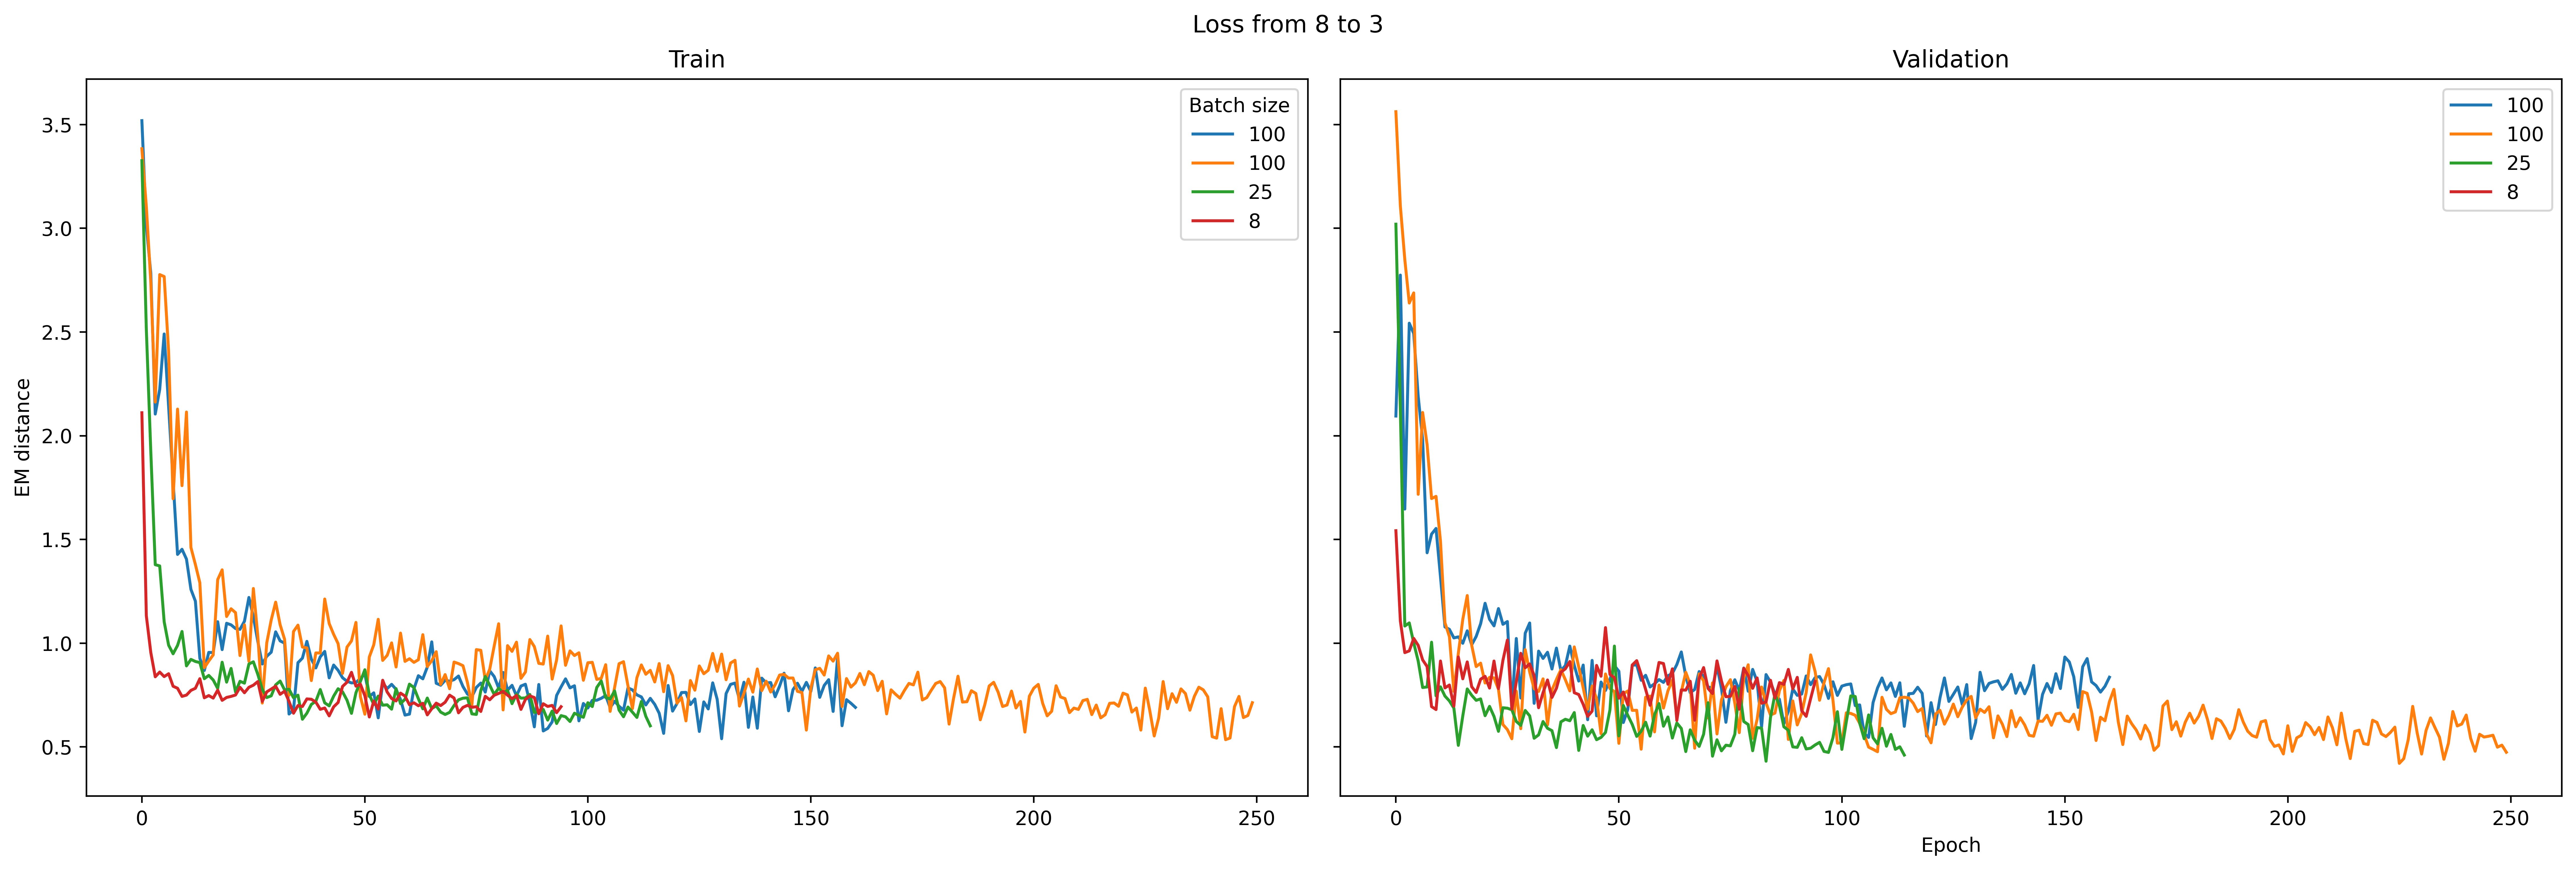

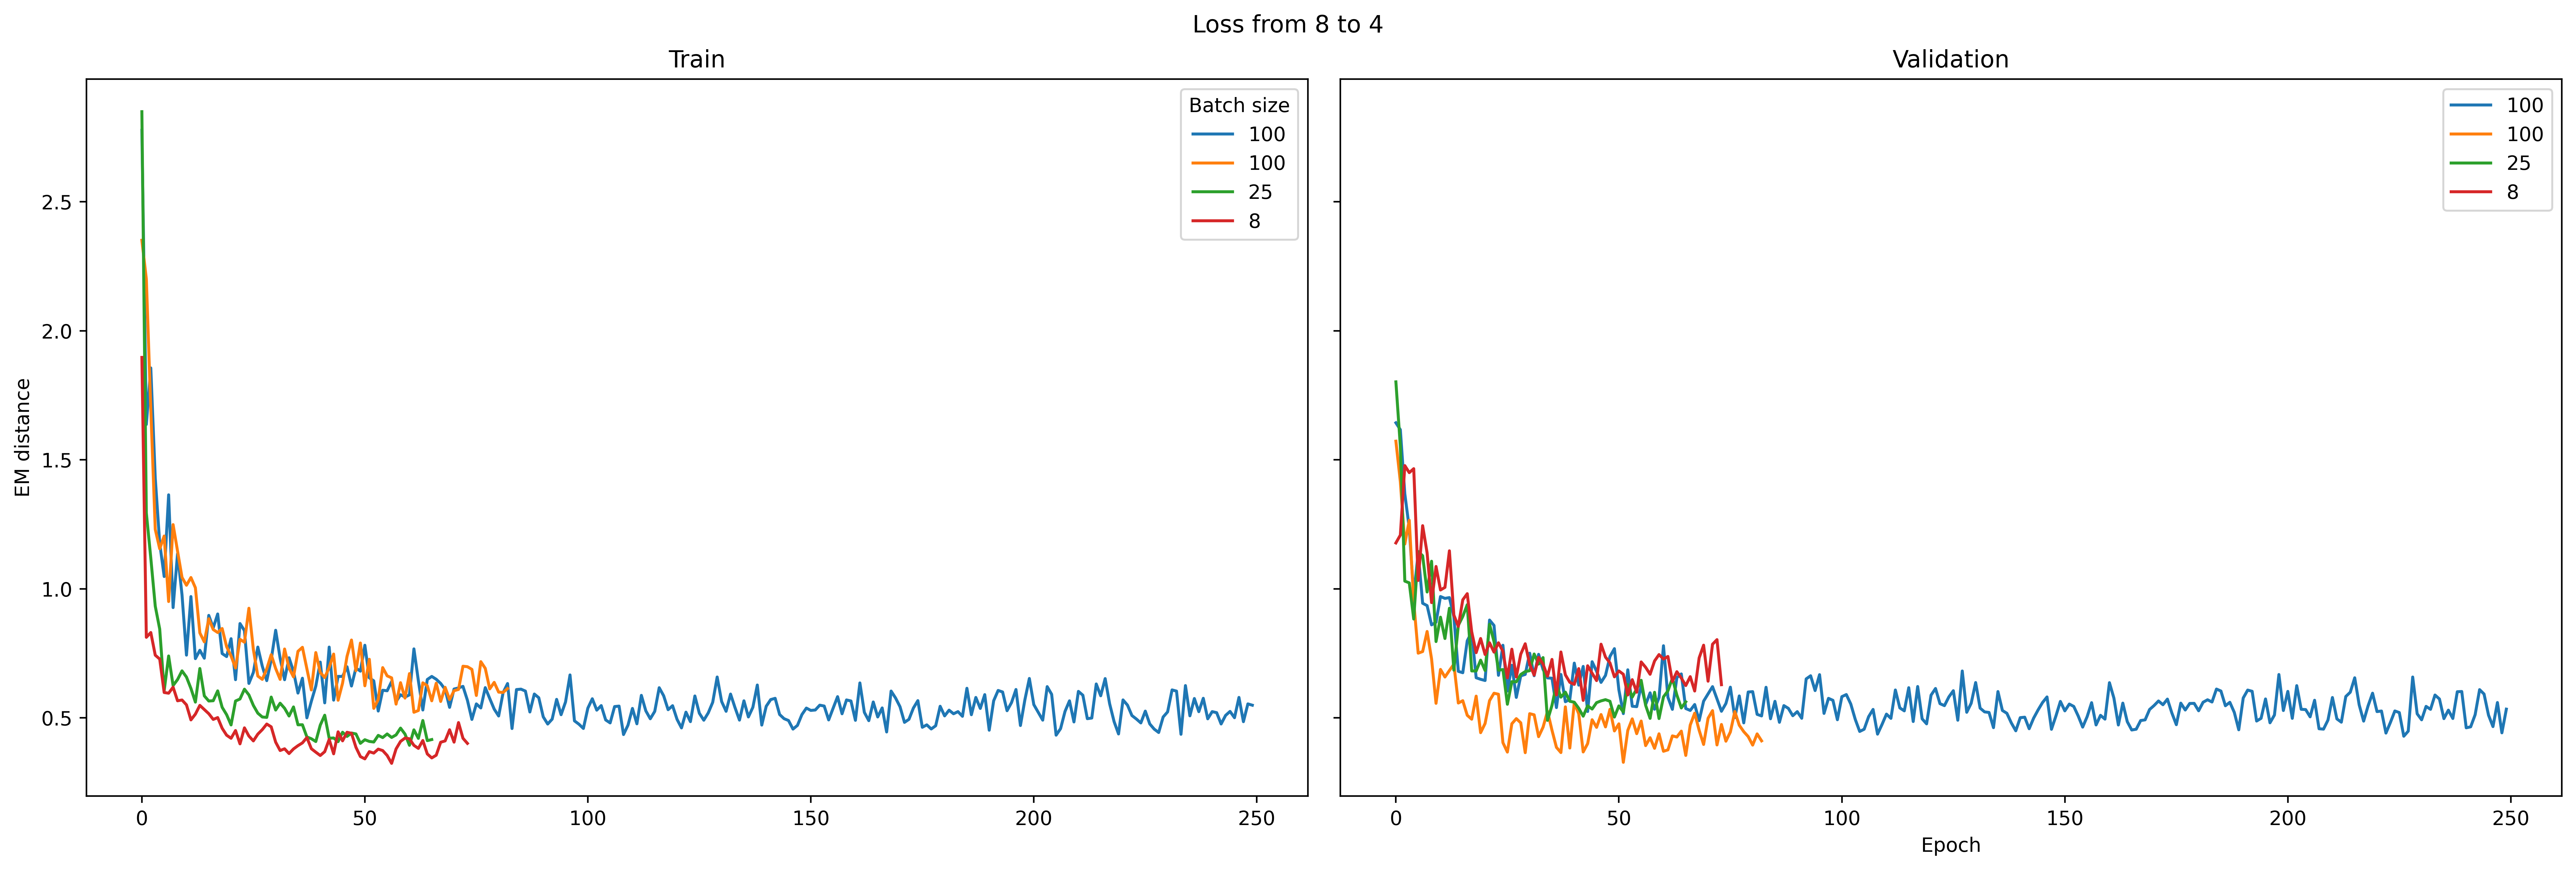

In [19]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# Define the main folder
main_folder = 'runs/ee'
# Initialize data storage
columns = ["Train", "Validation"]  # Titles for each column


plot_data = {}
i =1
mid_qubits = list(range(2,5))
for mq in mid_qubits:
    train_data_all = {} 
    val_data_all = {}

    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)
        for file in os.listdir(subfolder_path):
            file_path= os.path.join(subfolder_path, file)
            if 'loss_train' in file:
                mq_ver=file[15]
                if str(mq) in mq_ver:
                    append=file[11:]
                    train_file = os.path.join(subfolder_path, file)
                    val_file = os.path.join(subfolder_path, f'loss_val{append}')
                    #load losses
                    train_data = np.load(train_file)
                    val_data = np.load(val_file)
                    
                    # Collect data
                    train_data_all[(mq,subfolder,append[-5])]=(train_data)
                    val_data_all[(mq,subfolder,append[-5])]=(val_data)
    if train_data_all:

        fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(18,6),sharey=True,dpi=500)
        fig.suptitle(f'Loss from 8 to {mq}')
        axs[0].set_ylabel("EM distance")

        for k,tr in train_data_all.items():
            x=range(min(len(tr),250))
            sns.lineplot(x=x,y=tr[:min(len(tr),250)], ax=axs[0],label=k[1]);
            axs[0].set_title('Train')
            l=axs[0].legend()
            l.set_title('Batch size')
        for k,vr in val_data_all.items():
            x=range(min(len(vr),250))
            l=axs[1].legend()
            l.set_title('Batch size')
            sns.lineplot(x=x,y=vr[:min(len(vr),250)], ax=axs[1],label=k[1]);
            axs[1].set_title('Validation')
            plt.xlabel("Epoch")

        plt.show()



In [ ]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the main folder
main_folder = 'runs/ed'

# Initialize data storage
plot_data = {}

# Traverse subfolders
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    train_data_all = []
    val_data_all = []

    for file in os.listdir(subfolder_path):
        if 'loss_train' in file:
            x = file[12]
            train_file = os.path.join(subfolder_path, f'loss_train_({x})().npy')
            val_file = os.path.join(subfolder_path, f'loss_val{x}.npy')

            # Load .npy files
            train_data = np.load(train_file)
            val_data = np.load(val_file)
            
            # Collect data
            train_data_all.append(train_data)
            val_data_all.append(val_data)

    # Adjust for different lengths by padding with NaN
    max_length = max(len(data) for data in train_data_all + val_data_all)
    
    train_data_all = [np.pad(data, (0, max_length - len(data)), constant_values=np.nan) for data in train_data_all]
    val_data_all = [np.pad(data, (0, max_length - len(data)), constant_values=np.nan) for data in val_data_all]

    # Stack and calculate element-wise statistics while ignoring NaNs
    train_data_all = np.vstack(train_data_all)  # Shape: (num_files, max_length)
    val_data_all = np.vstack(val_data_all)

    train_means = np.nanmean(train_data_all, axis=0)  # Element-wise mean ignoring NaNs
    train_stds = np.nanstd(train_data_all, axis=0)   # Element-wise std ignoring NaNs
    val_means = np.nanmean(val_data_all, axis=0)    # Element-wise mean ignoring NaNs
    val_stds = np.nanstd(val_data_all, axis=0)      # Element-wise std ignoring NaNs

    # Store data for plotting
    plot_data[subfolder] = {
        'train_means': train_means,
        'train_stds': train_stds,
        'val_means': val_means,
        'val_stds': val_stds
    }

# Plotting
for subfolder, data in plot_data.items():
    x_ticks = range(len(data['train_means']))  # X values corresponding to vector indices
    
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x=x_ticks, y=data['train_means'], label=f'Train {subfolder}', marker="o")

    ax.fill_between(x_ticks, 
                    np.array(data['train_means']) - np.array(data['train_stds']), 
                    np.array(data['train_means']) + np.array(data['train_stds']), 
                    alpha=0.3)

    sns.lineplot(x=x_ticks, y=data['val_means'], label=f'Validation {subfolder}', marker="o")
    ax.fill_between(x_ticks, 
                    np.array(data['val_means']) - np.array(data['val_stds']), 
                    np.array(data['val_means']) + np.array(data['val_stds']), 
                    alpha=0.3)

    plt.title(f'Loss Curves for {subfolder}')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
plt.tight_layout()


FileNotFoundError: [Errno 2] No such file or directory: 'runs/ed\\100\\loss_train_(8)().npy'

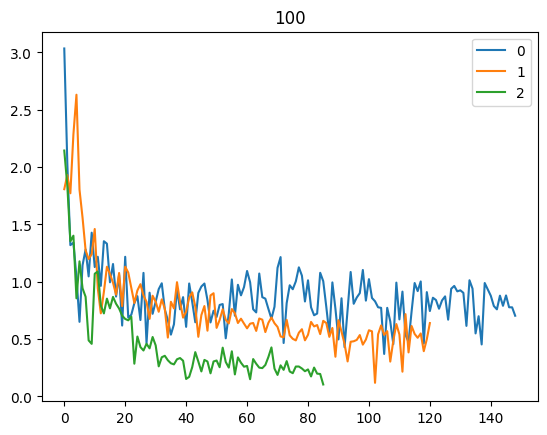

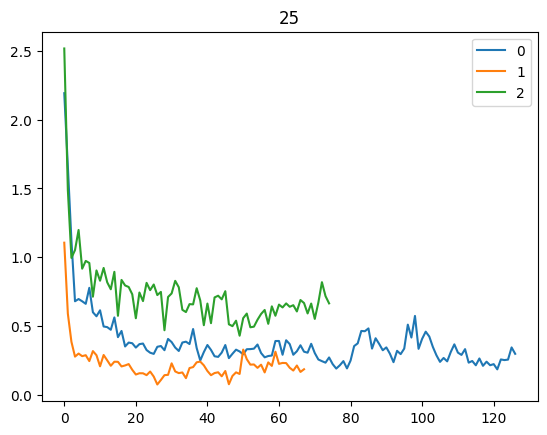

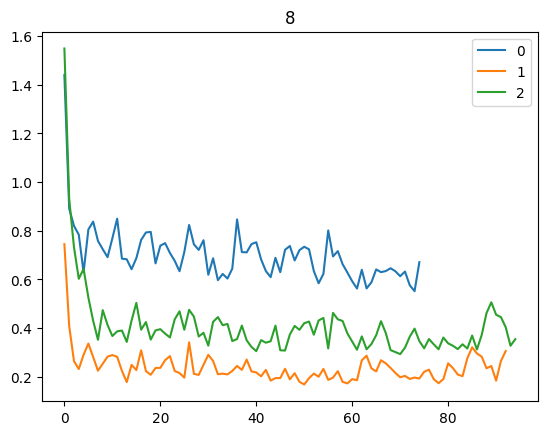

In [ ]:

for subfolder in os.listdir('runs/ed'):
    subfolder_path = os.path.join(main_folder, subfolder)
    train_data_all = []
    val_data_all = []

    for file in os.listdir(subfolder_path):
        if 'loss_train' in file:
            x=file[10]
            train_file = os.path.join(subfolder_path, f'loss_train{x}.npy')
            val_file = os.path.join(subfolder_path, f'loss_val{x}.npy')

            # Load .npy files
            train_data = np.load(train_file)
            val_data = np.load(val_file)
            
            # Collect data
            train_data_all.append(train_data)
            val_data_all.append(val_data)

    for i,t in enumerate(train_data_all):
        plt.plot(t,label=f'{i}')
    plt.title(subfolder)
    plt.legend()
    plt.show()